# 과제1. car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## 0.환경설정

* 필요한 라이브러리 로딩, 데이터셋 가져오기

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst                              # 가설검정 도구 가져오기

### 2) 데이터 불러오기

In [189]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
# data = pd.read_csv('Carseats.csv')
data.drop(['CompPrice','Income', 'Urban', 'Education'],axis = 1, inplace = True)
data.head()

,Sales,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,11,276,120,Bad,42,Yes
1,11.22,16,260,83,Good,65,Yes
2,10.06,10,269,80,Medium,59,Yes
3,7.40,4,466,97,Medium,55,Yes
4,4.15,3,340,128,Bad,38,No


|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태(Good, Medium, Bad)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(Yes, No)	|	feature	|


## 1.가설수립

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) Sales

In [219]:
target = 'Sales'

1) 변수의 비즈니스 의미

- 각 지역 판매액(단위 : 1000달러)  
- target variable  
- 분석단위 : 지역

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [220]:
data[target].isna().sum()

0

4) 기초통계량(수치화)

In [221]:
data[target].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

5) 분포 확인(시각화)

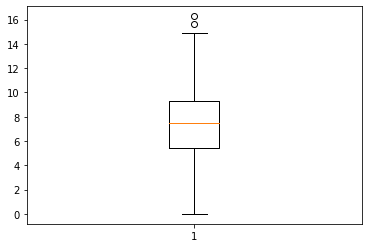

0.0 14.9


In [222]:
box = plt.boxplot(data[target])
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

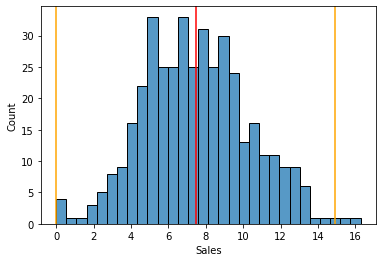

In [223]:
mean = data[target].mean()

sns.histplot(data[target], bins=30)

plt.axvline(l_fence, color = 'orange')
plt.axvline(mean, color = 'r')
plt.axvline(u_fence, color = 'orange')

plt.show()

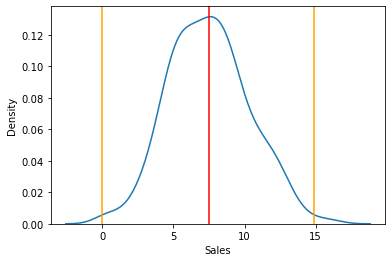

In [224]:
sns.kdeplot(data[target])
plt.axvline(l_fence, color = 'orange')
plt.axvline(mean, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 각 지역별로 판매액이 4~9 사이에 몰려있다. 여기를 기준으로 잘라서 분석해보면 어떨까?  
> * max가 이상치로 들어가 있네?

7) 추가 분석해 볼 사항이 있나요?

> * 인구가 많은 지역에 따라 인구가 높지 않을까?
> * 연령대에 따른 상가 및 백화점 인프라가 어떻게 될까?

### 2) Advertising

In [225]:
feature = 'Advertising'

1) 변수의 비즈니스 의미

> 각 지역, 회사의 광고 예산(단위 : 1000달러)

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [226]:
data[feature].isna().sum()

0

4) 기초통계량(수치화)

In [227]:
data[feature].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

5) 분포 확인(시각화)

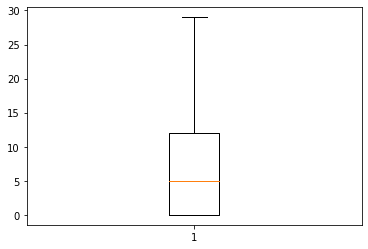

0.0 29.0


In [228]:
box = plt.boxplot(data[feature])
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

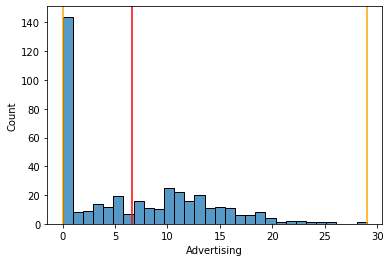

In [229]:
mean = data[feature].mean()

sns.histplot(data[feature], bins=30)

plt.axvline(l_fence, color = 'orange')
plt.axvline(mean, color = 'r')
plt.axvline(u_fence, color = 'orange')

plt.show()

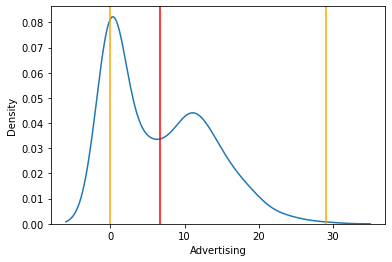

In [230]:
sns.kdeplot(data = data, x = feature)
plt.axvline(l_fence, color = 'orange')
plt.axvline(mean, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 광고예산이 없는 건가?
> * 분포가 2개 니까 잘라서 각각의 분포를 분석해볼 필요가 있어보인다

7) 추가 분석해 볼 사항이 있나요?

> * 광고예산이 0인 것을 따로 때어 내야하지 않을까?

### 3) Population

In [231]:
feature = 'Population'

1) 변수의 비즈니스 의미

> 지역 인구수(단위 : 1000명)

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [232]:
data[feature].isna().sum()

0

4) 기초통계량(수치화)

In [233]:
data[feature].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

5) 분포 확인(시각화)

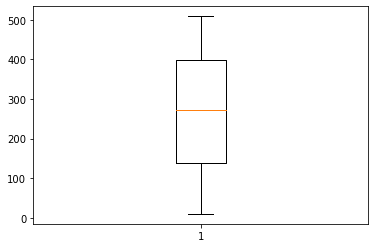

10.0 509.0


In [234]:
box = plt.boxplot(data[feature])
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

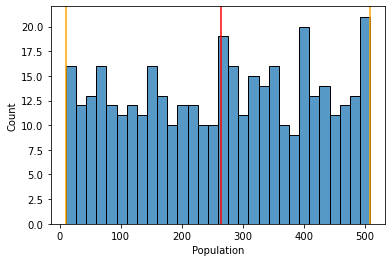

In [235]:
mean = data[feature].mean()

sns.histplot(data[feature], bins=30)

plt.axvline(l_fence, color = 'orange')
plt.axvline(mean, color = 'r')
plt.axvline(u_fence, color = 'orange')

plt.show()

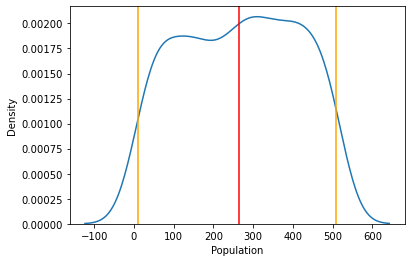

In [236]:
sns.kdeplot(data = data, x = feature)
plt.axvline(l_fence, color = 'orange')
plt.axvline(mean, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 인구수가 대부분 비슷비슷 해 보이면서도 차이가 나보인다.
> * 대도시와 위성도시인가? 살펴봐야겠다.
> * 인구는 판매액에 영향을 미치지 않을꺼 같다.

7) 추가 분석해 볼 사항이 있나요?

> * 밀도함수 그래프를 보니까 봉오리가 2개 보인다. 200~300 사이를 기준으로 나눠서 추가 분석을 해봐야 하지 않을까?

### 4) Price

In [237]:
feature = 'Price'

1) 변수의 비즈니스 의미

> 자사 지역별 판매가격(달러)

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [238]:
data[feature].isna().sum()

0

4) 기초통계량(수치화)

In [239]:
data[feature].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

5) 분포 확인(시각화)

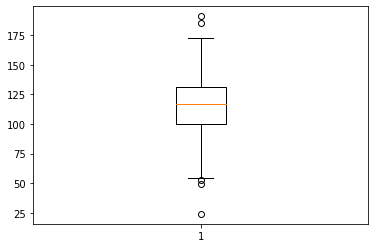

54.0 173.0


In [240]:
box = plt.boxplot(data[feature])
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

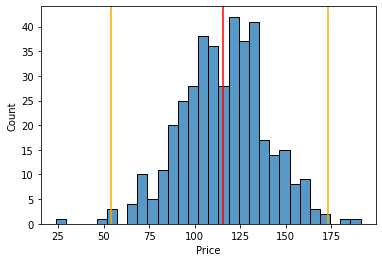

In [241]:
mean = data[feature].mean()

sns.histplot(data[feature], bins=30)

plt.axvline(l_fence, color = 'orange')
plt.axvline(mean, color = 'r')
plt.axvline(u_fence, color = 'orange')

plt.show()

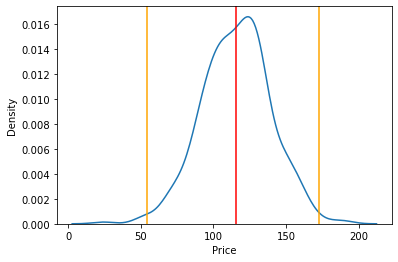

In [242]:
sns.kdeplot(data = data, x = feature)
plt.axvline(l_fence, color = 'orange')
plt.axvline(mean, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 이상치는 특가세일 & 재고정리 & 이월상품 이라서 가격이 저렴한건가? 신상품인가?
> * 평균선을 기준으로 대칭이다.

7) 추가 분석해 볼 사항이 있나요?

> * 가격에 따른 진열상태 및 Age를 살펴봐도 좋을꺼같다

### 5) ShelveLoc

In [243]:
feature = 'ShelveLoc'

1) 변수의 비즈니스 의미

> 진열상태(Good, Medium, Bad)

2) 숫자, 범주?

> 범주

3) NaN 존재 유무

In [244]:
data[feature].isna().sum()

0

4) 기초통계량(수치화)

In [249]:
print(data[feature].value_counts())
print()
print(data[feature].value_counts()/ len(data[feature]))

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64


5) 분포 확인(시각화)

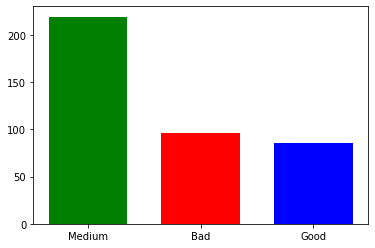

In [250]:
# 집계
cnt = data[feature].value_counts()

# bar plot
plt.bar(cnt.index, cnt.values, color = ['g', 'r', 'b'], width = .7)
plt.show()

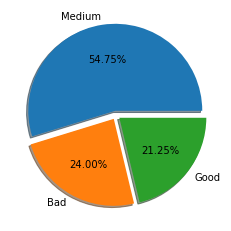

In [251]:
# 집계
cnt = data[feature].value_counts()

# pie chart
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
       explode = [0.05, 0.05, 0.05], shadow=True)
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 진열상태가 좋아야 판매액이 높을꺼 같은데, 한번 살펴볼 필요가 있다.

7) 추가 분석해 볼 사항이 있나요?

> * 가격에 따른 진열상태에 영향을 미칠까?

### 6) [추가]Age

In [252]:
feature = 'Age'

1) 변수의 비즈니스 의미

> 지역 인구의 평균 연령

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [253]:
data[feature].isnull().sum()

0

4) 기초통계량(수치화)

In [254]:
data[feature].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

5) 분포 확인(시각화)

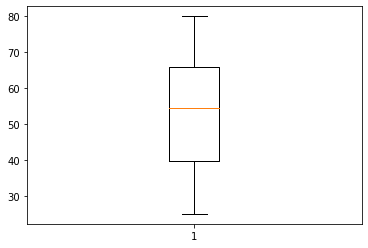

25.0 80.0


In [256]:
box = plt.boxplot(data[feature])
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

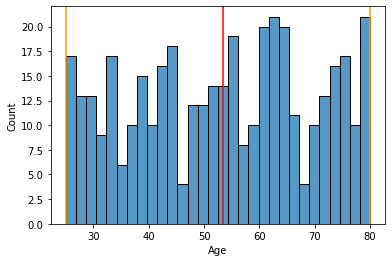

In [257]:
mean = data[feature].mean()

sns.histplot(data[feature], bins=30)

plt.axvline(l_fence, color = 'orange')
plt.axvline(mean, color = 'r')
plt.axvline(u_fence, color = 'orange')

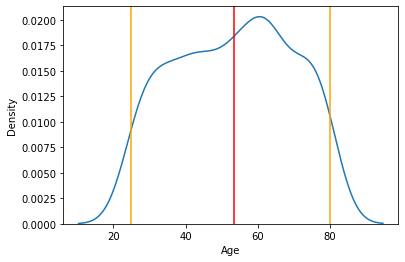

In [258]:
sns.kdeplot(data = data, x = feature)
plt.axvline(l_fence, color = 'orange')
plt.axvline(mean, color = 'r')
plt.axvline(u_fence, color = 'orange')

plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 30대 이하의 신혼부부는 첫아이이기 때문에 카시트가 없어서 카시트 구매가 높은 편에 속하고 60대가 손주에게 카시트를 선물하려고 구매하는게 아닐까?

7) 추가 분석해 볼 사항이 있나요?

> * 30대와 60대를 기준으로 각각잘라서 자세히 살펴볼 필요가 있다.
> * 연령대별로 나눠서 보면 좋겠다 10대, 20대, 30대 등

### 7) [추가]US

In [262]:
feature = 'US'

1) 변수의 비즈니스 의미

In [263]:
data[feature].unique()

array(['Yes', 'No'], dtype=object)

> 매장이 미국에 있는지 여부(Yes, No)

2) 숫자, 범주?

> 범주

3) NaN 존재 유무

In [264]:
data[feature].isna().sum()

0

4) 기초통계량(수치화)

In [265]:
print(data[feature].value_counts())
print()
print(data[feature].value_counts()/ len(data[feature]))

Yes    258
No     142
Name: US, dtype: int64

Yes    0.645
No     0.355
Name: US, dtype: float64


5) 분포 확인(시각화)

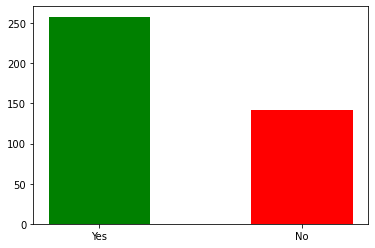

In [266]:
# 집계
cnt = data[feature].value_counts()

# bar plot
plt.bar(cnt.index, cnt.values, color = ['g', 'r'], width = .5)
plt.show()

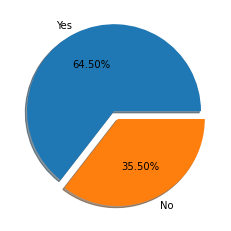

In [267]:
# 집계
cnt = data[feature].value_counts()

# pie chart
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
       explode = [0.05, 0.05], shadow=True)
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 카시트가 미국에도 있고 해외에도 있다. 글로벌 회사인거 같다. 해외배송도 가능한걸까? 아니면 인터넷주문만 가능한건가?

7) 추가 분석해 볼 사항이 있나요?

> * 미국에 있는 매장을 이라는 새로운 컬럼을 만들어서 분석해야할 필요가 있다

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

### (1) 숫자형(수치형) X --> Y
* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

#### 1) Advertising -> Sales

In [268]:
feature = 'Advertising'

① 시각화 : scatter(regplot), jointplot

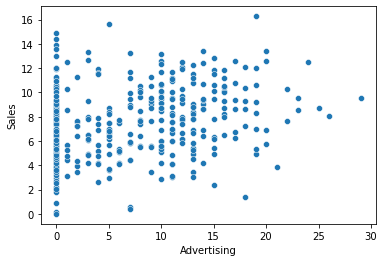

In [269]:
sns.scatterplot(x=feature, y=target, data = data)
plt.show()

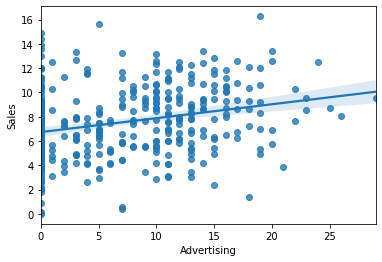

In [270]:
sns.regplot(x=feature, y=target, data = data)
plt.show()

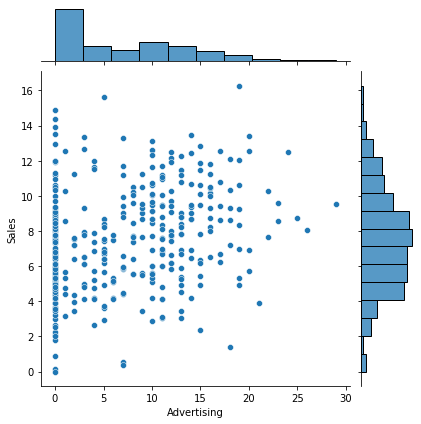

In [152]:
sns.jointplot(x=feature, y=target, data = data)
plt.show()

② 수치화 : 상관분석

In [271]:
print('상관계수:', spst.pearsonr(data[feature], data[target])[0])
print('p-value:', spst.pearsonr(data[feature], data[target])[1])

상관계수: 0.269506781376902
p-value: 4.377677110302732e-08


③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 산점도 그래프를 살펴보니 양의 상관관계가 보인다.
- p-value가 0.05보다 작기 때문에 Advertising과 지역판매액은 관계가 있다. (강한 관계)

> 0을 제외하고 분석을 해야하지 않을까?

#### 2) Population -> Sales

In [272]:
feature = 'Population'

① 시각화 : scatter(regplot), jointplot

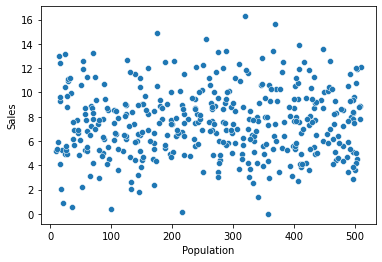

In [273]:
sns.scatterplot(x=feature, y=target, data = data)
plt.show()

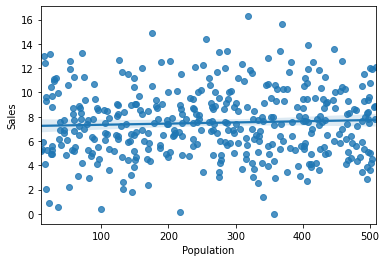

In [274]:
sns.regplot(x=feature, y=target, data = data)
plt.show()

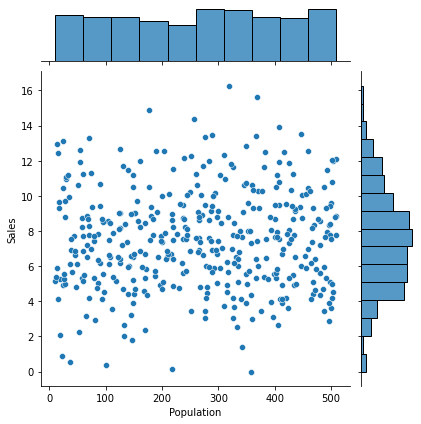

In [275]:
sns.jointplot(x=feature, y=target, data = data)
plt.show()

② 수치화 : 상관분석

In [276]:
print('상관계수:', spst.pearsonr(data[feature], data[target])[0])
print('p-value:', spst.pearsonr(data[feature], data[target])[1])

상관계수: 0.0504709844720392
p-value: 0.31398160931903


③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 산점도를 봐도 상관관계가 전혀 없어보였고
- p-value를 살펴보니 0.05보다 크기 때문에 인구와 지역판매액은 관련이 없다. (관계 없음)

#### 3) Price -> Sales

In [277]:
feature = 'Price'

① 시각화 : scatter(regplot), jointplot

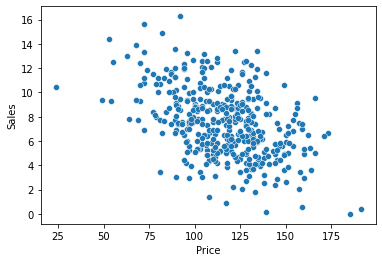

In [278]:
sns.scatterplot(x=feature, y=target, data = data)
plt.show()

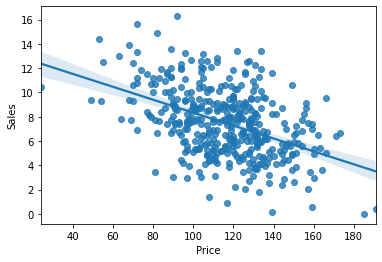

In [279]:
sns.regplot(x=feature, y=target, data = data)
plt.show()

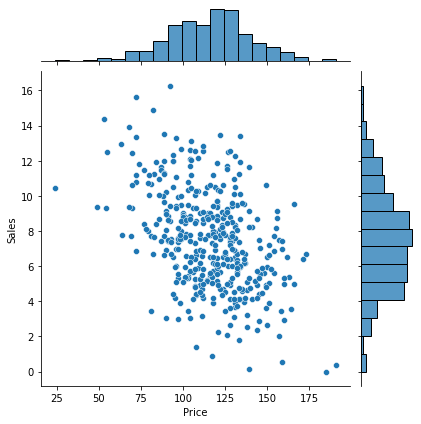

In [280]:
sns.jointplot(x=feature, y=target, data = data)
plt.show()

② 수치화 : 상관분석

In [281]:
print('상관계수:', spst.pearsonr(data[feature], data[target])[0])
print('p-value:', spst.pearsonr(data[feature], data[target])[1])

상관계수: -0.4449507278465726
p-value: 7.61818701191294e-21


③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 산점도그래프를 살펴보면 음의 상관관계가 보이고
- p-value가 0.5보다 작기 때문에 가격과 지역판매액은 관계가 있다. (강한 관계)

#### 4) [추가] Age -> Sales

In [282]:
feature = 'Age'

① 시각화 : scatter(regplot), jointplot

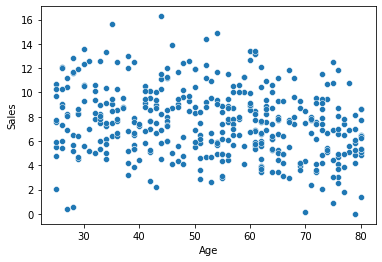

In [283]:
sns.scatterplot(x=feature, y=target, data = data)
plt.show()

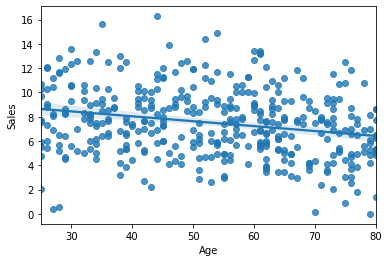

In [284]:
sns.regplot(x=feature, y=target, data = data)
plt.show()

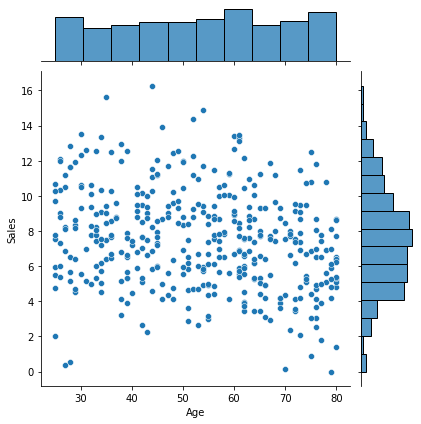

In [285]:
sns.jointplot(x=feature, y=target, data = data)
plt.show()

② 수치화 : 상관분석

In [286]:
print('상관계수:', spst.pearsonr(data[feature], data[target])[0])
print('p-value:', spst.pearsonr(data[feature], data[target])[1])

상관계수: -0.2318154396045765
p-value: 2.7889498393711916e-06


③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 산점도 그래프를 보면 나이와 지역판매액 상관관계가 약하게 보이긴 한다.
- p-value가 0.05보다 작으므로 나이와 지역판매는 상관관계가 있다. (약한 관계)

### (2) 범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

#### 1) ShelveLoc-> Sales

In [295]:
feature = 'ShelveLoc'

① 시각화 : 평균비교 barplot

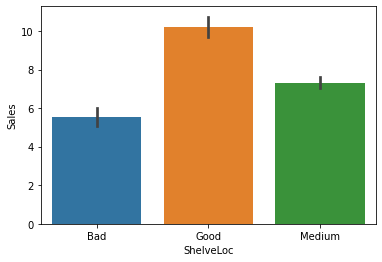

In [296]:
sns.barplot(x=feature, y=target, data = data)
plt.show()

② 수치화 : anova(범주 3개 이상)

In [297]:
bad = data.loc[data[feature]=='Bad', target]
good = data.loc[data[feature]=='Good', target]
medium = data.loc[data[feature]=='Medium', target]

spst.f_oneway(bad, good, medium)

F_onewayResult(statistic=92.22990509910346, pvalue=1.26693609015938e-33)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- bar그래프를 살펴보면 범주별로 차이가 많이 난다.
- p-value가 0.05보다 작으므로 각 지역 광고 예산과 지역판매는 상관관계가 있다. (강한 관계)

#### 2) [추가]US-> Sales

In [290]:
feature = 'US'

① 시각화 : 평균비교 barplot

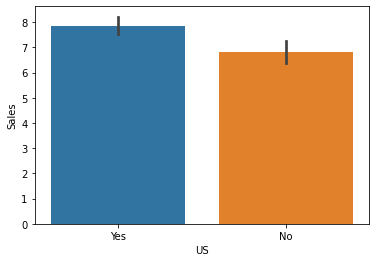

In [291]:
sns.barplot(x=feature, y=target, data = data)
plt.show()

② 수치화 : t-test(범주2개)

In [172]:
yes = data.loc[data[feature]=='Yes', target]
no = data.loc[data[feature]=='No', target]

spst.ttest_ind(yes, no)

Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- bar 그래프를 보면 범주별로 차이가 나긴 하지만 크게 차이가 나지는 않는다.
- p-value가 0.05보다 작으므로 매장이 미국에 있는지 여부와 지역판매는 상관관계가 있다. (약한 관계)

## 4.관계 정리

### 1) 강한관계의 변수

- Advertising
- Price
- ShelveLoc

### 2) 약한관계의 변수

- Age
- US

### 3) 관계 없음

- Population

### 4) 추가 분석

- 온라인인지 오프라인인지에 궁금하다  
- 할인쿠폰이나 특가세일이 있는지 궁금하다, 이것과 판매액이 관련이 어떻게 될까?